# Technical Indicators

- Moving averages, Stochastics, MACD, RSI
- Mathematical calculations on stock's price/volume
- Value used to anticipate future changes in price
- 2 types of indicators
    - Leading
        - attempting to forecast what prices will do
    - Lagging
        - movements in relatively long trends

## Moving Averages

- Momentum indicator / lagging indigator
- Average of the price over the last X days
- Smooth out the price data
- Simple moving average (SMA)
- Exponential moving average (EMA)

- https://www.investopedia.com/terms/m/movingaverage.asp

$MAn_i = \frac{C_{i-(n-1)} + C_{i-(n-2)} + \cdots + C_{i-1} + C_i}{n}$
- $MAn_i$: Moving average of period $n$ at trading day $i$.
- $n$: Period.
- $C_i$: Closing price at trading day $i$.

$MA10_{i} = \frac{C_{i-9} + C_{i-8} + \cdots + C_{i-1} + C_i}{n}$

**Signal**
- Close price > MAn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from yahoofinancials import YahooFinancials
from http.client import IncompleteRead

In [2]:
data = pd.read_csv('results/focus.csv', index_col=0)
df = data.head(5)

In [3]:
top_companies = []
for i, row in df.iterrows():
    print(i)
    top_companies.append(i)

ADMCM.HE
ICP1V.HE
VIAFIN.HE
NESTE.HE
GOFORE.HE


In [4]:
def price_history(company, timeline):
    max_try = 5
    attemp = 1
    while attemp < max_try:
        try:
            yf = YahooFinancials(company)
            data = yf.get_historical_price_data('2020-04-12', '2021-04-12', timeline)
            data_1 = data[company]['prices']

        except IncompleteRead:
            attemp += 1
            if attemp == max_try:
                print(f'Failed {N}')
        except ValueError as e:
            print(f'{e}: {N}')
            attemp = max_try
        else:
            break
            
    df = pd.DataFrame.from_dict(data_1)
    if timeline == 'weekly':
        df.to_csv(f"results/price_history_weekly_{company.split('.')[0]}.csv")
    elif timeline == 'monthly':
        df.to_csv(f"results/price_history_monthly_{company.split('.')[0]}.csv")
    else:
        df.to_csv(f"results/price_history_{company.split('.')[0]}.csv")

In [5]:
top_prices = []

for i in top_companies:
    price_history(i, 'daily')    
    top_prices.append(f"results/price_history_{i.split('.')[0]}.csv")
    print(f"results/price_history_{i.split('.')[0]}.csv")

results/price_history_ADMCM.csv
results/price_history_ICP1V.csv
results/price_history_VIAFIN.csv
results/price_history_NESTE.csv
results/price_history_GOFORE.csv


In [6]:
df_data = []
for i in top_prices:
    data = pd.read_csv(i, index_col='formatted_date', parse_dates=True)
    del data['Unnamed: 0']
    df_data.append(data)

In [7]:
companies = []
for n in range(len(df_data)):
    company = df_data[n]['close']
    companies.append(company)
df = pd.concat(companies, axis=1)
df.columns = top_companies
df

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE
formatted_date,,,,,
2020-04-14,71.800003,11.888585,9.550000,29.990000,7.340000
2020-04-15,68.000000,11.201880,9.250000,28.700001,7.340000
2020-04-16,67.000000,10.901446,8.800000,28.250000,6.960000
2020-04-17,67.000000,10.772689,8.600000,29.270000,7.280000
2020-04-20,67.400002,10.686851,8.500000,29.150000,7.220000
...,...,...,...,...,...
2021-04-01,97.000000,24.400000,17.049999,46.389999,21.799999
2021-04-06,95.400002,24.750000,17.350000,45.470001,21.700001
2021-04-07,98.000000,25.200001,17.400000,45.549999,21.500000


In [8]:
df['MA10'] = df[top_companies[1]].rolling(10).mean()
df

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE,MA10
formatted_date,,,,,,
2020-04-14,71.800003,11.888585,9.550000,29.990000,7.340000,NaN
2020-04-15,68.000000,11.201880,9.250000,28.700001,7.340000,NaN
2020-04-16,67.000000,10.901446,8.800000,28.250000,6.960000,NaN
2020-04-17,67.000000,10.772689,8.600000,29.270000,7.280000,NaN
2020-04-20,67.400002,10.686851,8.500000,29.150000,7.220000,NaN
...,...,...,...,...,...,...
2021-04-01,97.000000,24.400000,17.049999,46.389999,21.799999,24.240
2021-04-06,95.400002,24.750000,17.350000,45.470001,21.700001,24.275
2021-04-07,98.000000,25.200001,17.400000,45.549999,21.500000,24.305


<IPython.core.display.Javascript object>


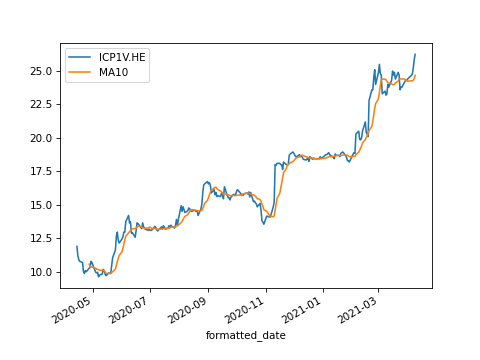

<AxesSubplot:xlabel='formatted_date'>

In [9]:
fig, ax = plt.subplots()
df[[top_companies[1], 'MA10']].plot(ax=ax)

In [10]:
df['MA50'] = df[top_companies[1]].rolling(50).mean()
df

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE,MA10,MA50
formatted_date,,,,,,,
2020-04-14,71.800003,11.888585,9.550000,29.990000,7.340000,NaN,NaN
2020-04-15,68.000000,11.201880,9.250000,28.700001,7.340000,NaN,NaN
2020-04-16,67.000000,10.901446,8.800000,28.250000,6.960000,NaN,NaN
2020-04-17,67.000000,10.772689,8.600000,29.270000,7.280000,NaN,NaN
2020-04-20,67.400002,10.686851,8.500000,29.150000,7.220000,NaN,NaN
...,...,...,...,...,...,...,...
2021-04-01,97.000000,24.400000,17.049999,46.389999,21.799999,24.240,22.303
2021-04-06,95.400002,24.750000,17.350000,45.470001,21.700001,24.275,22.419
2021-04-07,98.000000,25.200001,17.400000,45.549999,21.500000,24.305,22.549


<IPython.core.display.Javascript object>


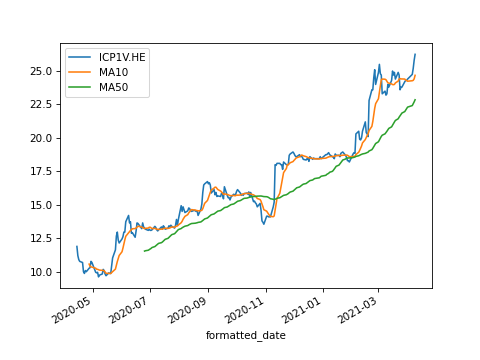

<AxesSubplot:xlabel='formatted_date'>

In [11]:
fig, ax = plt.subplots()
df[[top_companies[1], 'MA10', 'MA50']].plot(ax=ax)

## Exponential Moving Average

- https://www.investopedia.com/terms/m/movingaverage.asp

In [12]:
df['EMA50'] = df[top_companies[1]].ewm(span=50, adjust=False).mean()
df

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE,MA10,MA50,EMA50
formatted_date,,,,,,,,
2020-04-14,71.800003,11.888585,9.550000,29.990000,7.340000,NaN,NaN,11.888585
2020-04-15,68.000000,11.201880,9.250000,28.700001,7.340000,NaN,NaN,11.861655
2020-04-16,67.000000,10.901446,8.800000,28.250000,6.960000,NaN,NaN,11.824000
2020-04-17,67.000000,10.772689,8.600000,29.270000,7.280000,NaN,NaN,11.782772
2020-04-20,67.400002,10.686851,8.500000,29.150000,7.220000,NaN,NaN,11.739795
...,...,...,...,...,...,...,...,...
2021-04-01,97.000000,24.400000,17.049999,46.389999,21.799999,24.240,22.303,22.620951
2021-04-06,95.400002,24.750000,17.350000,45.470001,21.700001,24.275,22.419,22.704443
2021-04-07,98.000000,25.200001,17.400000,45.549999,21.500000,24.305,22.549,22.802308


<IPython.core.display.Javascript object>


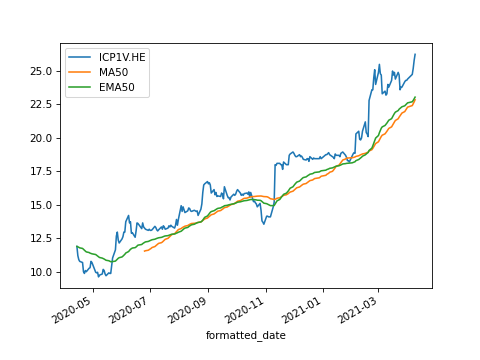

<AxesSubplot:xlabel='formatted_date'>

In [13]:
fig, ax = plt.subplots()
df[[top_companies[1], 'MA50', 'EMA50']].plot(ax=ax)

### MACD
- MACD is a lagging indicator when trading on the crossovers
- https://www.investopedia.com/terms/m/macd.asp

- Moving average convergence/difference
- One of the most common used indicators
- Laggings indicator
- Relationship between two moving averages of prices
- Signals to buy or sell with its signal line

**Calculation** (12-26-9 MACD (default), 8-17-9 MACD (more responsive))
- MACD=12-Period EMA − 26-Period EMA
- Singal line 9-Perioed EMA of MACD

**Signal**
- MACD > Signal line

In [14]:
exp1 = df[top_companies[1]].ewm(span=8, adjust=False).mean()
exp2 = df[top_companies[1]].ewm(span=17, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['Signal line'] = df['MACD'].ewm(span=9, adjust=False).mean()
df

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE,MA10,MA50,EMA50,MACD,Signal line
formatted_date,,,,,,,,,,
2020-04-14,71.800003,11.888585,9.550000,29.990000,7.340000,NaN,NaN,11.888585,0.000000,0.000000
2020-04-15,68.000000,11.201880,9.250000,28.700001,7.340000,NaN,NaN,11.861655,-0.076301,-0.015260
2020-04-16,67.000000,10.901446,8.800000,28.250000,6.960000,NaN,NaN,11.824000,-0.160549,-0.044318
2020-04-17,67.000000,10.772689,8.600000,29.270000,7.280000,NaN,NaN,11.782772,-0.229137,-0.081282
2020-04-20,67.400002,10.686851,8.500000,29.150000,7.220000,NaN,NaN,11.739795,-0.280436,-0.121113
...,...,...,...,...,...,...,...,...,...,...
2021-04-01,97.000000,24.400000,17.049999,46.389999,21.799999,24.240,22.303,22.620951,0.136244,0.230688
2021-04-06,95.400002,24.750000,17.350000,45.470001,21.700001,24.275,22.419,22.704443,0.176811,0.219913
2021-04-07,98.000000,25.200001,17.400000,45.549999,21.500000,24.305,22.549,22.802308,0.250492,0.226029


<IPython.core.display.Javascript object>


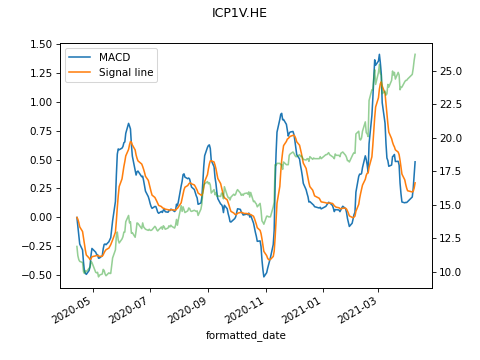

In [15]:
fig, ax = plt.subplots()
df[['MACD', 'Signal line']].plot(ax=ax)
df[top_companies[1]].plot(ax=ax, secondary_y=True, alpha=0.5)
plt.suptitle(top_companies[1])
plt.show()

In [16]:
df['MACD'] > df['Signal line']

formatted_date
2020-04-14    False
2020-04-15    False
2020-04-16    False
2020-04-17    False
2020-04-20    False
              ...  
2021-04-01    False
2021-04-06    False
2021-04-07     True
2021-04-08     True
2021-04-09     True
Length: 249, dtype: bool

### Stochastic oscillator
- Lagging indicator
- https://www.investopedia.com/terms/s/stochasticoscillator.asp

**Calculations**
- 14-high: Maximum of last 14 trading days
- 14-low: Minimum of last 14 trading days
- %K: (Last close - 14-low)*100 / (14-high - 14-low)
- %D: Simple Moving Average of %K

**Signal**
- %K > %D

In [18]:
df_data[0]

,date,high,low,open,close,volume,adjclose
formatted_date,,,,,,,
2020-04-14,1586847600,72.599998,67.199997,72.599998,71.800003,118619,71.226868
2020-04-15,1586934000,73.199997,67.400002,73.199997,68.000000,8693,67.457191
2020-04-16,1587020400,69.199997,66.599998,67.400002,67.000000,4792,66.465179
2020-04-17,1587106800,70.000000,66.599998,67.000000,67.000000,30657,66.465179
2020-04-20,1587366000,67.599998,65.199997,67.000000,67.400002,6935,66.861984
...,...,...,...,...,...,...,...
2021-04-01,1617260400,99.300003,87.000000,95.800003,97.000000,18678,97.000000
2021-04-06,1617692400,96.000000,93.000000,95.000000,95.400002,6483,95.400002
2021-04-07,1617778800,98.000000,94.599998,96.300003,98.000000,5591,98.000000


In [20]:
df = df_data[0]
high14 = df['high'].rolling(14).max()
low14 = df['low'].rolling(14).min()
# %K: (Last close - 14-low)*100 / (14-high - 14-low)
df['%K'] = pct_k = (df['close'] - low14)*100 / (high14 - low14)
df['%D'] = pct_d = pct_k.rolling(3).mean()
df['Signal'] = pct_k > pct_d

<IPython.core.display.Javascript object>


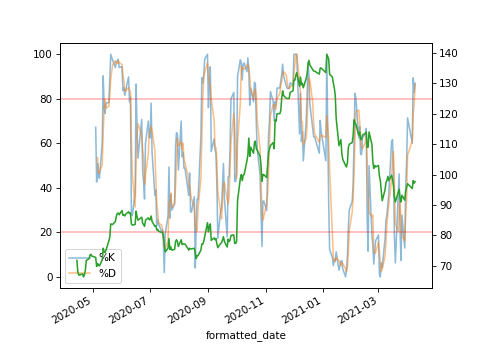

<AxesSubplot:label='63be1458-71ea-4f0b-8037-ad65bac01a21'>

In [24]:
fig, ax = plt.subplots()
df[['%K', '%D']].plot(ax=ax, alpha=0.5)
ax.axhline(80, c='r', alpha=0.3)
ax.axhline(20, c='r', alpha=0.3)
df['close'].plot(ax=ax, secondary_y=True)